In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from statistics import mean, median

In [2]:
file = "./tc1.csv"
data = pd.read_csv(file)



TCPdata = data[data["Protocol"]=="TCP"]


## Part 1

In [3]:

SYNdata = TCPdata[TCPdata["Info"].str.contains("\[SYN\]")]
SYNdataDest = SYNdata[TCPdata["Info"].str.contains(">  21")]
SYNdataSrc = SYNdata[TCPdata["Info"].str.contains("21  >")]   #dont take this one
UniqueServer = set(SYNdataSrc["Source"].unique().tolist()) | set(SYNdataDest["Destination"].unique().tolist())
len(UniqueServer)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


59

## Part 2

In [4]:
# data["SrcPort"] = data["Info"][data["Info"].str.extract(pat = '(\d+)  >  (\d+)')
tempList = TCPdata["Info"].tolist()
srcList = [string[:string.find("[")].strip().split('  >  ')[0] for string in tempList]
destList = [string[:string.find("[")].strip().split('  >  ')[1] for string in tempList]
srcList, destList
TCPdata["SrcPort"] = srcList
TCPdata["DestPort"] = destList
uniqueTCPflows = TCPdata.drop_duplicates(subset = ["Source", "Destination", "SrcPort", "DestPort"])
len(uniqueTCPflows)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


3256

## Part 3

<BarContainer object of 24 artists>

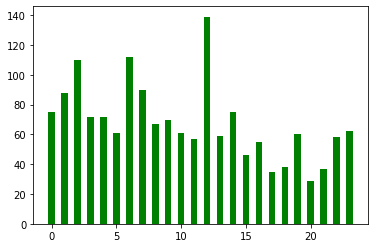

In [5]:
TCPfrequency = {}
for i in range(24):
    TCPfrequency[i] = 0
TCPflowsToServers = uniqueTCPflows[uniqueTCPflows["DestPort"]=="21"]
timeList = TCPflowsToServers["Time"].tolist()
timeList = [int(time // 3600) for time in timeList]
for time in timeList:
    TCPfrequency[time] += 1
TCPfrequency

plt.bar(TCPfrequency.keys(), TCPfrequency.values(), 0.5, color='g')

## Part 4

In [ ]:
SYNdata = TCPdata[TCPdata["Info"].str.contains("\[SYN\]")]# | TCPdata["Info"].str.contains("\[FIN\]")]
FINdata = TCPdata[TCPdata["Info"].str.contains("\[FIN, ACK\]")]# | TCPdata["Info"].str.contains("\[FIN\]")]
RSTdata = TCPdata[TCPdata["Info"].str.contains("\[RST\]")]# | TCPdata["Info"].str.contains("\[FIN\]")]



SYNdata["Info"]


In [ ]:
FINdata

In [ ]:
RSTdata

In [ ]:
timeList = []
for i in range(5):
    startTime = SYNdata.iloc[i,1]
    Src = SYNdata.iloc[i,2]
    Dest = SYNdata.iloc[i,3]
    SrcPort = SYNdata.iloc[i,7]
    DestPort = SYNdata.iloc[i,8]


    validFIN1 = FINdata[(FINdata["Source"] == Src) & (FINdata["Destination"] == Dest) & (FINdata["SrcPort"] == SrcPort) & (FINdata["DestPort"] == DestPort) & (FINdata["Time"]>startTime)]
    validFIN2 = FINdata[(FINdata["Source"] == Dest) & (FINdata["Destination"] == Src) & (FINdata["SrcPort"] == DestPort) & (FINdata["DestPort"] == SrcPort) & (FINdata["Time"]>startTime)]
    validRST1 = RSTdata[(RSTdata["Source"] == Src) & (RSTdata["Destination"] == Dest) & (RSTdata["SrcPort"] == SrcPort) & (RSTdata["DestPort"] == DestPort) & (RSTdata["Time"]>startTime)]
    validRST2 = RSTdata[(RSTdata["Source"] == Dest) & (RSTdata["Destination"] == Src) & (RSTdata["SrcPort"] == DestPort) & (RSTdata["DestPort"] == SrcPort) & (RSTdata["Time"]>startTime)]
    
    validFrames =  pd.concat([validFIN1, validFIN2, validRST1, validRST2])

    print(SYNdata.iloc[i])
    print(validFrames)

    



In [6]:
def plotCDF(inputList):
    num_bins = 100
    counts, bin_edges = np.histogram (inputList, bins=num_bins, normed=True)
    cdf = np.cumsum (counts)
    plt.plot (bin_edges[1:], cdf/cdf[-1])

In [7]:
SYNdata

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,142.164.6.70,131.243.1.10,TCP,62,1313 > 21 [SYN] Seq=1734984547 Win=8760 Len=...
2,3,2.962409,142.164.6.70,131.243.1.10,TCP,62,1313 > 21 [SYN] Seq=1734984547 Win=8760 Len...
90,91,105.078090,73.6.91.115,131.243.2.12,TCP,62,2027 > 21 [SYN] Seq=4190971401 Win=16384 Len...
399,400,222.785014,82.143.24.12,131.243.2.12,TCP,62,3537 > 21 [SYN] Seq=2986625670 Win=16384 Len...
484,485,251.651531,79.37.53.67,131.243.2.12,TCP,62,35280 > 21 [SYN] Seq=4133316359 Win=16384 Le...
729,730,372.521806,67.243.63.146,131.243.1.10,TCP,62,1380 > 21 [SYN] Seq=3849101 Win=8192 Len=0 M...
800,801,380.893000,67.243.63.146,131.243.1.10,TCP,62,1383 > 21 [SYN] Seq=3857473 Win=8192 Len=0 M...
894,895,387.263386,67.243.63.146,131.243.1.10,TCP,62,1385 > 21 [SYN] Seq=3863843 Win=8192 Len=0 M...
1059,1060,403.788599,67.243.63.146,131.243.1.10,TCP,62,1388 > 21 [SYN] Seq=3880239 Win=8192 Len=0 M...
1151,1152,414.570994,67.243.63.146,131.243.1.10,TCP,62,1390 > 21 [SYN] Seq=3891097 Win=8192 Len=0 M...


## Part 6 ... note that SYN data always sends to server

['21']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


,No.,Time,Source,Destination,Protocol,Length,Info,SrcPort,DestPort
0,1,0.000000,142.164.6.70,131.243.1.10,TCP,62,1313 > 21 [SYN] Seq=1734984547 Win=8760 Len=...,1313,21
2,3,2.962409,142.164.6.70,131.243.1.10,TCP,62,1313 > 21 [SYN] Seq=1734984547 Win=8760 Len...,1313,21
90,91,105.078090,73.6.91.115,131.243.2.12,TCP,62,2027 > 21 [SYN] Seq=4190971401 Win=16384 Len...,2027,21
399,400,222.785014,82.143.24.12,131.243.2.12,TCP,62,3537 > 21 [SYN] Seq=2986625670 Win=16384 Len...,3537,21
484,485,251.651531,79.37.53.67,131.243.2.12,TCP,62,35280 > 21 [SYN] Seq=4133316359 Win=16384 Le...,35280,21
729,730,372.521806,67.243.63.146,131.243.1.10,TCP,62,1380 > 21 [SYN] Seq=3849101 Win=8192 Len=0 M...,1380,21
800,801,380.893000,67.243.63.146,131.243.1.10,TCP,62,1383 > 21 [SYN] Seq=3857473 Win=8192 Len=0 M...,1383,21
894,895,387.263386,67.243.63.146,131.243.1.10,TCP,62,1385 > 21 [SYN] Seq=3863843 Win=8192 Len=0 M...,1385,21
1059,1060,403.788599,67.243.63.146,131.243.1.10,TCP,62,1388 > 21 [SYN] Seq=3880239 Win=8192 Len=0 M...,1388,21
1151,1152,414.570994,67.243.63.146,131.243.1.10,TCP,62,1390 > 21 [SYN] Seq=3891097 Win=8192 Len=0 M...,1390,21


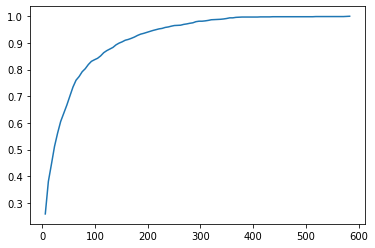

In [18]:
SYNdata = TCPdata[TCPdata["Info"].str.contains("\[SYN\]")]

print(SYNdata.DestPort.unique().tolist())#head(), end="\n\n")
# print(SYNdata.tail(), end="\n\n")

SYNinterArrivalTimes = SYNdata.Time.tolist()
# print(SYNinterArrivalTimes[:10], SYNinterArrivalTimes[-10:], end="\n\n")
SYNinterArrivalTimes = [SYNinterArrivalTimes[0]] + [SYNinterArrivalTimes[i+1]-SYNinterArrivalTimes[i] for i in range(len(SYNinterArrivalTimes)-1) ]
# print(SYNinterArrivalTimes[:10], SYNinterArrivalTimes[-10:], end="\n\n")
meanTime, medianTime = mean(SYNinterArrivalTimes), median(SYNinterArrivalTimes)
plotCDF(SYNinterArrivalTimes)
meanTime, medianTime
SYNdata

## Part 7

['21']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


,No.,Time,Source,Destination,Protocol,Length,Info,SrcPort,DestPort
0,1,0.000000,142.164.6.70,131.243.1.10,TCP,62,1313 > 21 [SYN] Seq=1734984547 Win=8760 Len=...,1313,21
2,3,2.962409,142.164.6.70,131.243.1.10,TCP,62,1313 > 21 [SYN] Seq=1734984547 Win=8760 Len...,1313,21
4,5,4.695735,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984548 Ack=116610283...,1313,21
34,35,7.205578,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984548 Ack=116610415...,1313,21
38,39,13.620653,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984564 Ack=116610422...,1313,21
48,49,27.408515,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984601 Ack=116610432...,1313,21
54,55,31.998236,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984618 Ack=116610444...,1313,21
58,59,39.171420,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984623 Ack=116610447...,1313,21
62,63,45.447171,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984629 Ack=116610450...,1313,21
76,77,67.855524,142.164.6.70,131.243.1.10,TCP,54,1313 > 21 [ACK] Seq=1734984674 Ack=116610466...,1313,21


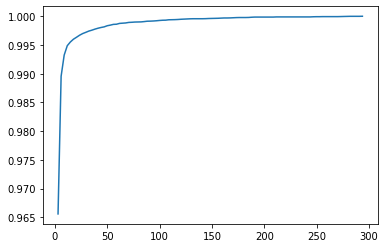

In [20]:
toServerData = TCPdata[TCPdata["DestPort"] == "21"]

print(SYNdata.DestPort.unique().tolist())#head(), end="\n\n")

serverInterArrivalTimes = toServerData.Time.tolist()
serverInterArrivalTimes = [serverInterArrivalTimes[0]] + [serverInterArrivalTimes[i+1]-serverInterArrivalTimes[i] for i in range(len(serverInterArrivalTimes)-1) ]

meanTime, medianTime = mean(serverInterArrivalTimes), median(serverInterArrivalTimes)
plotCDF(serverInterArrivalTimes)
meanTime, medianTime
toServerData

## Part 8 ... plot seperately

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


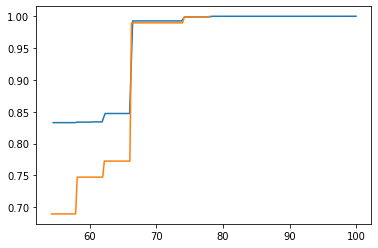

In [17]:
toServerData = TCPdata[TCPdata["DestPort"] == "21"]
fromServerData = TCPdata[TCPdata["SrcPort"] == "21"]


toServerLengths = toServerData.Length.tolist()
fromServerLengths = fromServerData.Length.tolist()

# toServerMeanTime, toServerMedianTime = mean(toServerLengths), median(toServerLengths)
# fromServerMeanTime, fromServerMedianTime = mean(fromServerLengths), median(fromServerLengths)

plotCDF(toServerLengths)
plotCDF(fromServerLengths)